In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Updated_CRU.csv')
df.head()

,time,lat,lon,timeseries-tas-monthly-mean,year,month,dayofyear,quarter,week,weekofyear,...,spline_dayofyear_180,spline_dayofyear_181,spline_day_of_week_0,spline_day_of_week_1,spline_day_of_week_2,SMA_10,SMA_20,CMA,EMA_0.1,EMA_0.3
0,1901-01-31,37.0,-97.0,2.729315,1901.0,1.0,16.0,1.0,3.0,3.0,...,0.0,0.0,0.105442,0.246842,0.647716,2.729315,2.729315,2.729315,2.729315,2.729315
1,1901-02-28,37.0,-97.0,1.498751,1901.0,2.0,46.0,1.0,7.0,7.0,...,0.0,0.0,0.596696,0.064626,0.338678,2.114033,2.114033,2.114033,2.606258,2.360146
2,1901-03-31,37.0,-97.0,6.857611,1901.0,3.0,75.0,1.0,11.0,11.0,...,0.0,0.0,0.647716,0.246842,0.105442,3.695226,3.695226,3.695226,3.031394,3.709385
3,1901-04-30,37.0,-97.0,11.149125,1901.0,4.0,106.0,2.0,16.0,16.0,...,0.0,0.0,0.044218,0.522352,0.433431,5.558701,5.558701,5.558701,3.843167,5.941307
4,1901-05-31,37.0,-97.0,16.921551,1901.0,5.0,136.0,2.0,20.0,20.0,...,0.0,0.0,0.338678,0.064626,0.596696,7.831271,7.831271,7.831271,5.151005,9.235380


In [6]:
df_updated = df[['time', 'lat', 'lon', 'timeseries-tas-monthly-mean']].copy()
df_updated.head()

,time,lat,lon,timeseries-tas-monthly-mean
0,1901-01-31,37.0,-97.0,2.729315
1,1901-02-28,37.0,-97.0,1.498751
2,1901-03-31,37.0,-97.0,6.857611
3,1901-04-30,37.0,-97.0,11.149125
4,1901-05-31,37.0,-97.0,16.921551


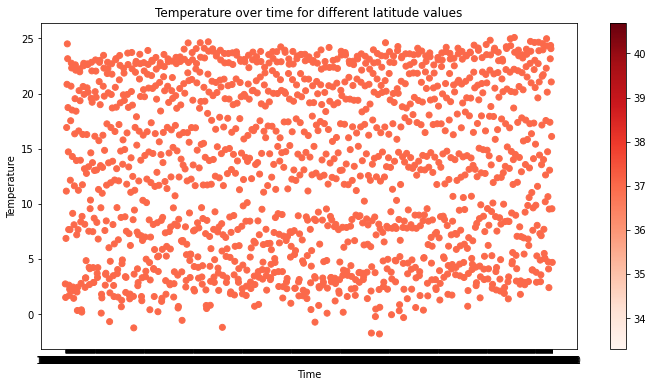

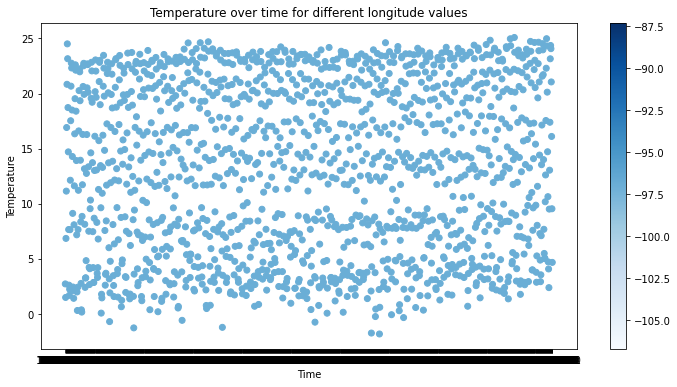

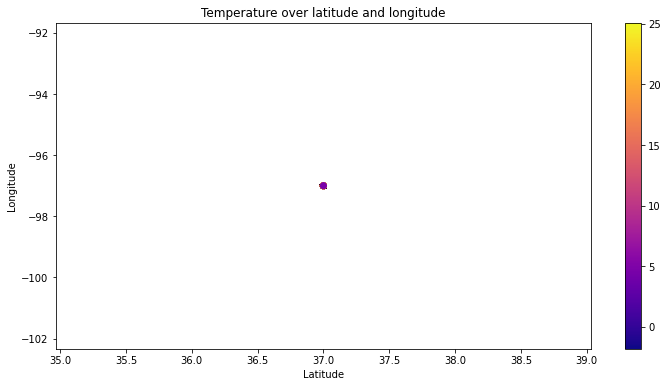

In [12]:
time = df_updated.iloc[:, 0]
lat = df_updated.iloc[:, 1]
lon = df_updated.iloc[:, 2]
temp = df_updated.iloc[:, 3]

# Plot the temperature values over time for different latitude and longitude values
plt.figure(figsize=(12, 6))
plt.scatter(time, temp, c=lat, cmap='Reds')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over time for different latitude values')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(time, temp, c=lon, cmap='Blues')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over time for different longitude values')
plt.show()

# Plot the temperature values over latitude and longitude for different time values
plt.figure(figsize=(12, 6))
plt.scatter(lat, lon, c=temp, cmap='plasma')
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperature over latitude and longitude')
plt.show()

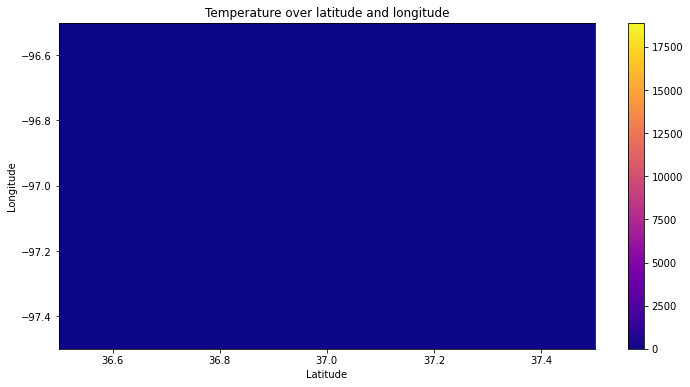

In [15]:
nbins = 10000

# Create the 2D histogram
H, xedges, yedges = np.histogram2d(lat, lon, bins=nbins, range=[[lat.min(), lat.max()], [lon.min(), lon.max()]], weights=temp)

# Plot the 2D histogram
plt.figure(figsize=(12, 6))
plt.imshow(H.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='plasma')
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Temperature over latitude and longitude')
plt.show()